# DSRP - Machine Learning III
## Métricas Clasificación

In [53]:
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

# clasificación
from sklearn.metrics import accuracy_score,classification_report, precision_score, auc, recall_score, f1_score, roc_curve, roc_auc_score
# regresión
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [2]:
bank_marketing_raw_data = pd.read_csv("../data/bank-marketing.csv")

In [3]:
bank_marketing_raw_data

,age,age group,eligible,job,salary,marital,education,marital-education,targeted,default,...,contact,day,month,duration,campaign,pdays,previous,poutcome,y,response
0,58,5,Y,management,100000,married,tertiary,married-tertiary,yes,no,...,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,4,Y,technician,60000,single,secondary,single-secondary,yes,no,...,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,3,Y,entrepreneur,120000,married,secondary,married-secondary,yes,no,...,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,4,Y,blue-collar,20000,married,unknown,married-unknown,no,no,...,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,3,Y,unknown,0,single,unknown,single-unknown,no,no,...,unknown,5,may,198,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,5,Y,technician,60000,married,tertiary,married-tertiary,yes,no,...,cellular,17,nov,977,3,-1,0,unknown,yes,1
45207,71,7,N,retired,55000,divorced,primary,divorced-primary,yes,no,...,cellular,17,nov,456,2,-1,0,unknown,yes,1
45208,72,7,N,retired,55000,married,secondary,married-secondary,yes,no,...,cellular,17,nov,1127,5,184,3,success,yes,1
45209,57,5,Y,blue-collar,20000,married,secondary,married-secondary,yes,no,...,telephone,17,nov,508,4,-1,0,unknown,no,0


In [5]:
bank_marketing_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   age group          45211 non-null  int64 
 2   eligible           45211 non-null  object
 3   job                45211 non-null  object
 4   salary             45211 non-null  int64 
 5   marital            45211 non-null  object
 6   education          45211 non-null  object
 7   marital-education  45211 non-null  object
 8   targeted           45211 non-null  object
 9   default            45211 non-null  object
 10  balance            45211 non-null  int64 
 11  housing            45211 non-null  object
 12  loan               45211 non-null  object
 13  contact            45211 non-null  object
 14  day                45211 non-null  int64 
 15  month              45211 non-null  object
 16  duration           45211 non-null  int64

In [6]:
bank_marketing_raw_data["response"].value_counts()

response
0    39922
1     5289
Name: count, dtype: int64

In [8]:
CLASSIFICATION_FEATURES = ["age", "balance", "salary"]
CLASSIFICATION_RESPONSE = "response"


X = bank_marketing_raw_data[CLASSIFICATION_FEATURES]
y = bank_marketing_raw_data[CLASSIFICATION_RESPONSE]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.25)

In [9]:
classifier = GradientBoostingClassifier()
classifier.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [24]:
y_test

3610     0
11677    0
33018    0
44323    1
8119     0
        ..
39673    0
29223    0
34939    0
28358    0
27682    0
Name: response, Length: 11303, dtype: int64

<Axes: >

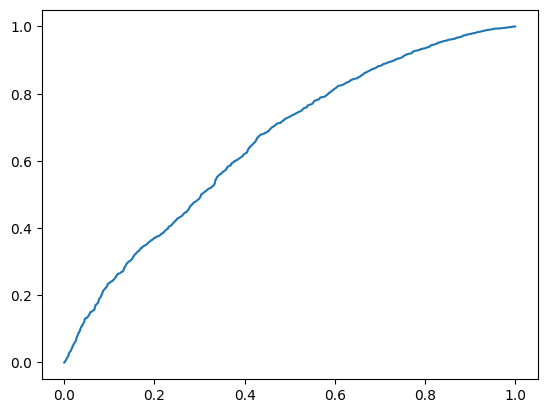

In [31]:
tpr, fpr, _ = roc_curve(y_test, probabilities_gbt[:,0], pos_label=1 )

sns.lineplot(x=fpr, y=tpr)

In [38]:
auc(fpr, tpr)

0.3417771676940752

In [13]:
predictions_gbt = classifier.predict(X_test)
probabilities_gbt = classifier.predict_(X_test)

In [40]:
def calculate_classification_metrics(y_real, predictions ) -> dict:
    """
    Calcula metricas de clasificacion
    """
    
    
    return {
        "accuracy": accuracy_score(y_real, predictions),
        "precision": precision_score(y_real, predictions),
        "recall": recall_score(y_real, predictions),
        "f1_score": f1_score(y_real, predictions),
        "auc_score": roc_auc_score( predictions, y_real)
        
    }

calculate_classification_metrics(y_real=y_test, predictions=predictions_gbt)

{'accuracy': 0.884278510130054,
 'precision': 0.4482758620689655,
 'recall': 0.00996168582375479,
 'f1_score': 0.019490254872563718,
 'auc_score': 0.6668379487744154}

## Métricas Regresión

In [42]:
lift_raw_data = pd.read_csv("../data/Lyftdataset.csv")

In [43]:
lift_raw_data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-11,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,01-01-11,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,01-01-11,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,01-01-11,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,01-01-11,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,31-12-12,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,31-12-12,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,31-12-12,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,31-12-12,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [51]:
lift_raw_data["cnt"].mean()

np.float64(189.46308763450142)

In [56]:
lift_raw_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [44]:
lift_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [45]:
REGRESSION_FEATURES = ["temp", "hum", "holiday"]
REGRESSION_RESPONSE = "cnt"

X = lift_raw_data[REGRESSION_FEATURES]
y = lift_raw_data[REGRESSION_RESPONSE]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.25)

In [46]:
regressor = GradientBoostingRegressor()
regressor.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [49]:
predictions_rgbt = regressor.predict(X_test)

In [50]:
def calculate_regression_metrics(y_real, predictions) -> dict:
    """calculo de metricas de regresion
    """
    return {
        "mse": mean_squared_error(y_real, predictions),
        "rmse": mean_squared_error(y_real, predictions)**0.5,
        "mae":mean_absolute_error(y_real, predictions),
        "mape": mean_absolute_percentage_error(y_real, predictions)
    }

calculate_regression_metrics(y_real=y_test, predictions=predictions_rgbt)

{'mse': 24251.476953331072,
 'rmse': 155.72885716311885,
 'mae': 115.79293002438814,
 'mape': 4.9329913948301325}

In [55]:
np.mean(predictions_rgbt)

np.float64(190.92698399288489)

In [57]:
y_test - predictions_rgbt

15652    288.825199
3085       5.371410
1684      30.965416
10555      5.709704
14622    -63.004079
            ...    
10817     56.421339
8228     -21.331784
2951     -76.596529
4659    -191.332051
11093    -63.099270
Name: cnt, Length: 4345, dtype: float64